Ecole Normale Supérieure de l'Enseignement Technique - Mohammedia<br>
Master : Systèmes Distribués et Intelligence Artificielle<br>
Module : Machine Learning<br>
<b>IGUIDER Amine && Younnes Hassouni</b><br>
Année universitaire 2023 - 2024

# Red Wine Quality Prediction using Classification Model

<p>Wine Quality classification is a difficult piece of work since taste is the least factor of the human senses. A good wine quality prediction can be very useful in the certification process. This project aims to determine which features are the best quality of red wine and generate insights into each of these attributes.</p>
<h1>Description of Dataset</h1>
<ol style="font-size:16px">The attributes that are involved in this dataset are : <br/>
<li>Fixed Acidity: These are non-volatile acids that do not evaporate readily.</li>
<li>Volatile Acidity: The amount of acetic acid present in the wine.</li>
<li>Citric Acid: It adds ‘Freshness’ and flavor to wines.</li>
<li>Residual Sugar: Amount of sugar left after fermentation.</li>
<li>Chlorides: The amount of salt in the wine.</li>
<li>Free Sulfur Dioxide: SO2 prevents microbial growth and the oxidation of wine.</li>
<li>Total sulfur Dioxide: Total SO2 becomes evident in the nose and taste of wine.</li>
<li>Density: The density of water depends on the percentage of alcohol and sugar content.</li>
<li>pH: It describes the level of acidity on a scale from 0–14. Most wines are always between 3–4 on the pH scale.</li>
<li>Sulphates: A wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant</li>
<li>Alcohol: The percentage of alcohol content in the wine.</li>
<li>Quality: which is the output variable/predictor.</li></ol>

# Exploratory Data Analysis (EDA) and Data Pre-processing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Loading the Data

In [17]:
data=pd.read_csv("winequality-red.csv",delimiter=';')

In [18]:
# Display the first few rows of the DataFrame
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [20]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
#Using isnull().sum() function we can find out the missing values in the data.
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data Analysis

The graphical representation of the data that provides the useful information to discover the patterns and insights of the data. Here in this wine data, various graphs are plotted to find the quality of the wine.

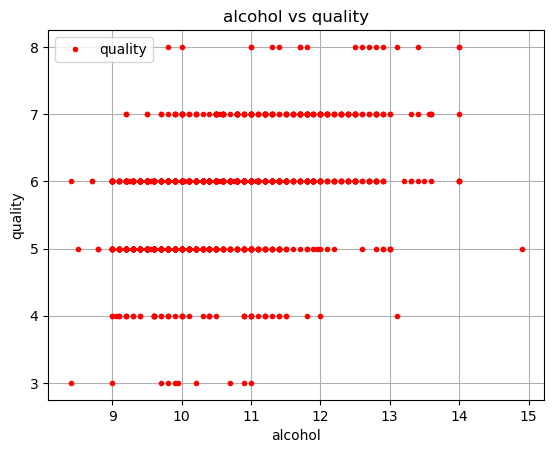

In [23]:
data.plot(x='alcohol',y='quality',style='.',color='r') 
plt.title('alcohol vs quality') 
plt.xlabel('alcohol') 
plt.ylabel('quality') 
plt.grid() 
plt.show()

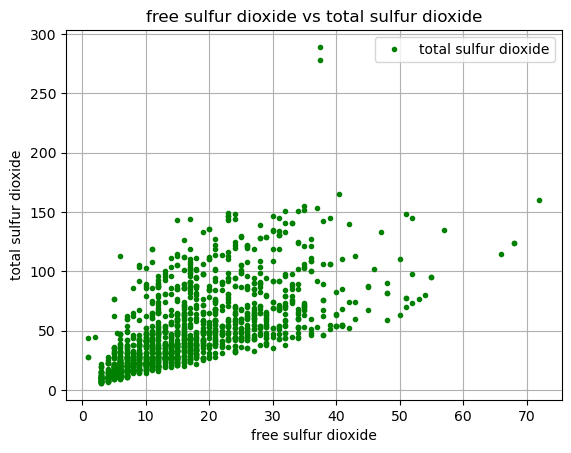

In [24]:
data.plot(x='free sulfur dioxide',y='total sulfur dioxide', style='.',color='g')
plt.title('free sulfur dioxide vs total sulfur dioxide')
plt.xlabel('free sulfur dioxide')
plt.ylabel('total sulfur dioxide')
plt.grid()
plt.show()

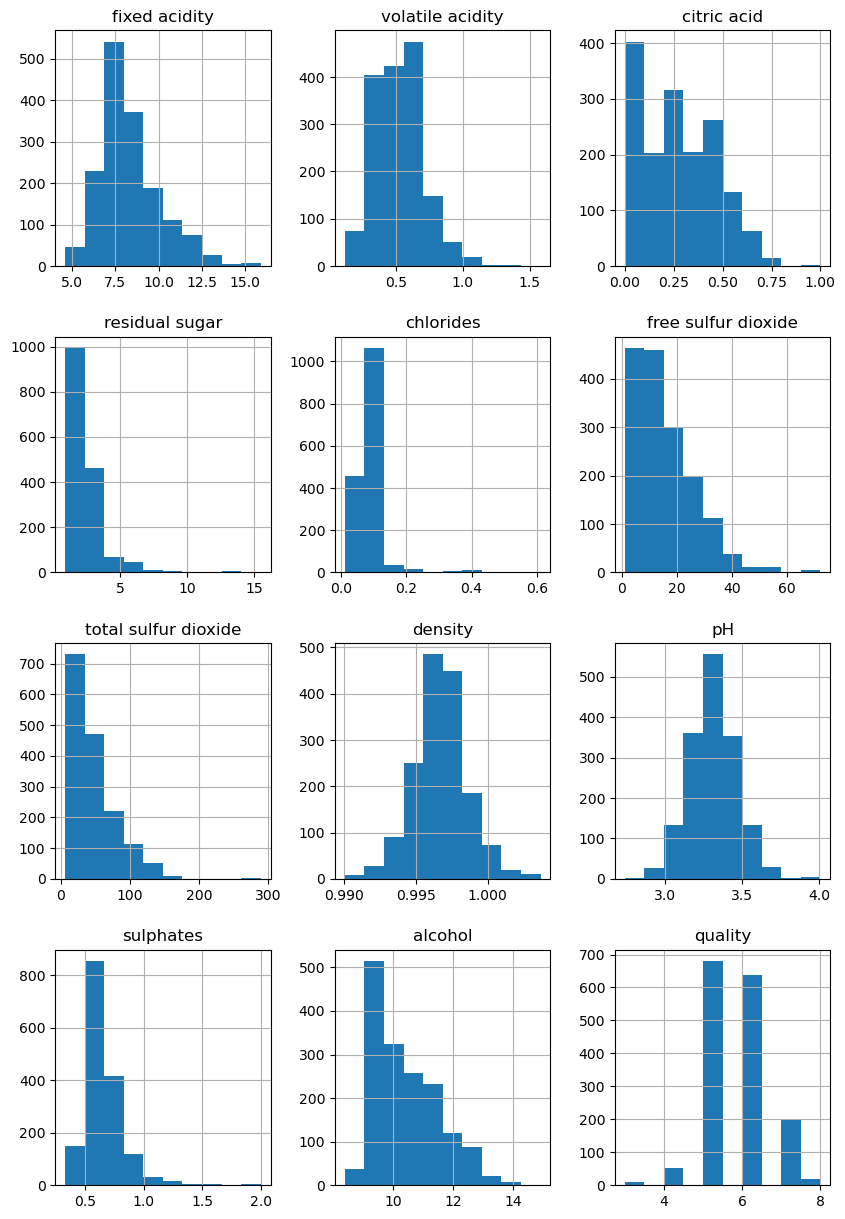

In [25]:
data.hist(figsize=(10,15))
plt.show()

C:\Users\T15\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


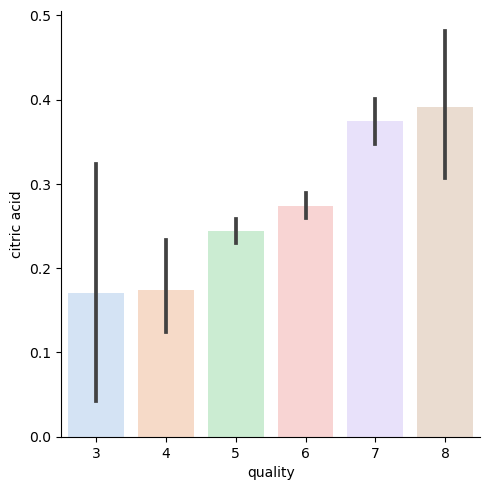

In [26]:
sb.catplot(data=data, kind="bar",x="quality",y="citric acid",palette="pastel",alpha=.5, height=5)

<Axes: xlabel='quality', ylabel='citric acid'>

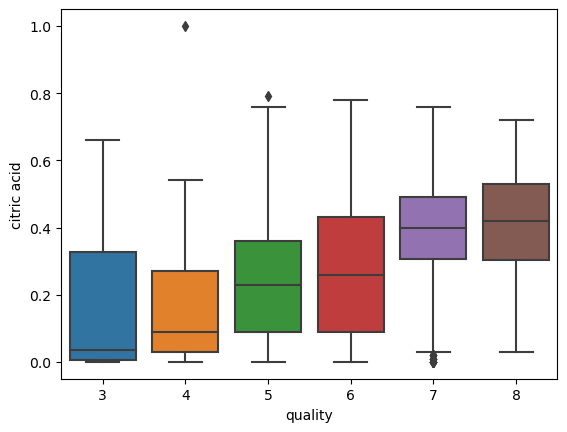

In [34]:
sb.boxplot(x="quality",y="citric acid",data=data)

<Axes: xlabel='quality', ylabel='fixed acidity'>

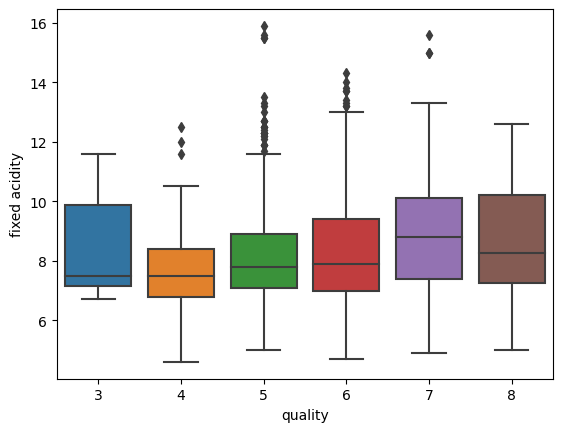

In [35]:
sb.boxplot(x="quality",y="fixed acidity",data=data)

## Correlation

In [36]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

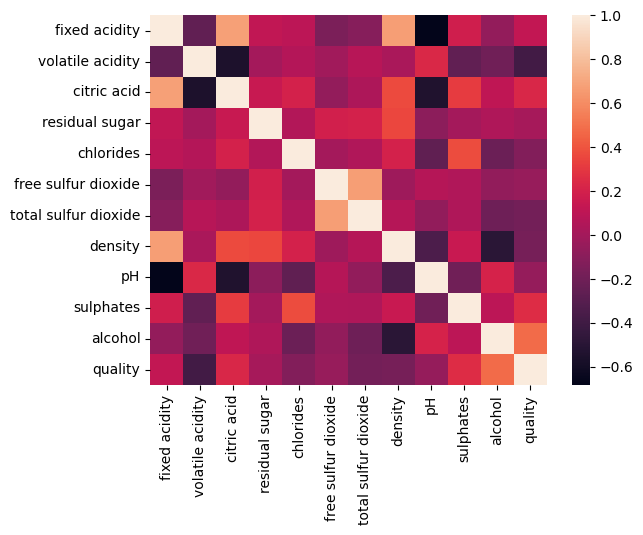

In [37]:
sb.heatmap(data.corr())

In [38]:
data['winequality']=[1 if x>=6 else 0 for x in data['quality']]
X=data.drop(['quality','winequality'],axis = 1)
y=data['winequality']
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winequality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


## Splitting the Data

We use train_test_split() in sklearn model selection to split the data into two subsets-Training and Testing data. Here in this wine data, training is carried out with 80% and testing with 20%.

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Normalizing the data

We use normalization because the data is unbalanced and so we scale them to 1 and 0. MinMaxScaler() function is used to transform the features by scaling each feature to a given range.

In [40]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
fit=mm.fit(X_train)
X_train=fit.transform(X_train)
X_test=fit.transform(X_test)

# Evaluating the Model

### Random Forest Classifier

<b>Random Forest Classifier</b> is the model used here to evaluate the performance of wine quality. Since Random Forest Classifier takes less training time and also it gives the output with high accuracy even for large dataset it is the efficient algorithm preferred among all the ML models

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

random=RandomForestClassifier()
fit=random.fit(X_train,y_train)

score=random.score(X_test,y_test)
print('The score of the model is : ',score)
predict=random.predict(X_test)
print(classification_report(predict,y_test))

The score of the model is :  0.815625
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       149
           1       0.83      0.83      0.83       171

    accuracy                           0.82       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.82      0.82      0.82       320



In [43]:
data= {'Actual values': y_test,'predicted values': predict}
pd.DataFrame(data)

,Actual values,predicted values
1109,1,1
1032,0,0
1002,1,1
487,1,0
979,0,0
...,...,...
794,1,1
813,0,1
1322,0,1
704,0,0


Finally we conclude that Almost all the predicted values are similar to the actual values. This model gives us the accuracy of 80%.A good wine quality is identified by its smell,taste,balance of its components. By predicting the quality of wine using ML technique we can help industries to certify the process of classifying whether it is good quality or bad quality of wine.

### Support Vector Machine (SVM):

Support Vector Machine is a powerful classification algorithm that is effective in high-dimensional spaces and works well with relatively small datasets. It's particularly useful when there's a clear margin of separation between classes.

In [63]:
#SVM is used as a binary classifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
# For binary classification, let's consider quality >= 6 as good quality (1) and < 6 as bad quality (0)
y_train_binary = (y_train >= 6).astype(int)
y_test_binary = (y_test >= 6).astype(int)
# Create an SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Evaluate the model
svm_score = svm_classifier.score(X_test, y_test)
print('SVM Classifier Score:', svm_score)

# Make predictions
svm_predictions = svm_classifier.predict(X_test)

# Classification report
print(classification_report(y_test, svm_predictions))

SVM Classifier Score: 0.74375
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       148
           1       0.76      0.76      0.76       172

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



In [49]:
data= {'Actual values': y_test,'predicted values': svm_predictions}
pd.DataFrame(data)

,Actual values,predicted values
1109,1,1
1032,0,0
1002,1,1
487,1,0
979,0,1
...,...,...
794,1,1
813,0,1
1322,0,1
704,0,0


## Gradient Boosting Classifier for binary classification

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Evaluate the model
gb_score = gb_classifier.score(X_test, y_test)
print('Gradient Boosting Classifier Score:', gb_score)

# Make predictions
gb_predictions = gb_classifier.predict(X_test)

# Classification report
print(classification_report(y_test, gb_predictions))


Gradient Boosting Classifier Score: 0.759375
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       148
           1       0.77      0.78      0.78       172

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



In [51]:
data= {'Actual values': y_test,'predicted values': gb_predictions}
pd.DataFrame(data)

,Actual values,predicted values
1109,1,1
1032,0,0
1002,1,1
487,1,0
979,0,1
...,...,...
794,1,1
813,0,1
1322,0,1
704,0,0


In [58]:
# Random Forest Classifier
print("Accuracy",score) #0.815625
# Support Vector Machine (SVM)
print("Accuracy",svm_score) #0.74375
# Gradient Boosting Classifier for binary classification
print("Accuracy",gb_score) #0.759375

Accuracy 0.815625
Accuracy 0.74375
Accuracy 0.759375
